# Thúy Nga - Team 2 - Google Play Store

![](https://www.brandnol.com/wp-content/uploads/2019/04/Google-Play-Store-Search.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/lava18/google-play-store-apps)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of null values. How should we handle them?
- Column `Installs` and `Size` have some strange values. Can you identify them?
- Values in `Size` column are currently in different format: `M`, `k`. And how about the value `Varies with device`?
- `Price` column is not in the right data type
- And more...


## Link:
**Github**: https://github.com/ThuyNga1198/coderschool_GoogleData

**Datastudio**: datastudio.google.com/reporting/4750fe08-316f-4b64-921a-8719bdcf8003

### Đọc dữ liệu

In [ ]:
# datastudio.google.com/reporting/4750fe08-316f-4b64-921a-8719bdcf8003
# link datavisual

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
google_play=pd.read_csv('google-play-store.csv')

In [3]:
google_play.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [4]:
google_play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
google_play.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Ta thấy có 1 vài cột dữ liệu có kiểu có vẻ không đúng lắm nên ra sẽ đi định dạng lại nó

### Reviews 

In [6]:
print(google_play.Reviews.unique()[-200:])

['63782' '201537' '11051' '38826' '7615646' '176487' '264282' '2721923'
 '15070' '100179' '318867' '172373' '25438' '283823' '3895' '9562' '42621'
 '1279800' '710' '19051' '10743' '76498' '37090' '6396' '5285' '68025'
 '273244' '3047' '9606' '3840' '1905' '15221' '1749' '5229' '342' '670'
 '37140' '761' '795' '2019' '758590' '15883' '401' '91397' '1697' '1526'
 '5675' '5015' '41074' '2317' '981' '729' '4354' '1463' '13819' '2378'
 '3704' '1539' '20755' '407694' '5534114' '38487' '8649' '43645' '44027'
 '83671' '85410' '839206' '20364' '1228' '26347' '71476' '995002' '29415'
 '79464' '72522' '2980' '28429' '60097' '3502' '9296' '12257' '12919'
 '8122' '221691' '320334' '73185' '18584' '687136' '1063' '2027' '26545'
 '70753' '21735' '2917' '83427' '615' '424' '15036' '4838' '481' '37277'
 '13469' '2390' '479' '3673' '691' '1711' '346' '2372' '3.0M' '42432'
 '30668' '59768' '26224' '105954' '38473' '452589' '2183' '156322' '35171'
 '2505' '660613' '22570' '16282' '103199' '33788' '1517' '

Vì có 3.0M không thuộc kiểu số nên ta tiến hành chuyển đổi nó

In [7]:
# hàm chuyển đổi M (million) thành số nguyên
def transform_Reviews(s):
    number=float(s.strip('M'))
    return number*1000000   

In [8]:
# chuyển đổi trên cột
google_play.Reviews=google_play.Reviews.apply(transform_Reviews)

### Installs 

In [9]:
# kiểm tra các biến có trong cột Installs 
google_play.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

Vì có xuất hiện biến là Free nên ta xem xét nó


In [10]:
google_play[google_play.Installs=='Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000.0,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Vì cột Installs có giá trị 'Free' và các cột khác thì có vẻ như bị lệch nên ta quyết định xóa nó

In [11]:
# xóa các dòng có giá trị Free trên cột Installs
google_play=google_play[google_play.Installs!='Free']

Các biến trên cột Installs có các kí hiệu '+' và ',' làm cho kiểu dữ liệu không thể đưa về số nên ta sẽ định dạng nó

In [12]:
# Hàm chuyển đổi string thành số nguyên
def transform_Installs(s):
    s=s.replace(',','') #xóa các kí hiệu ',' ra khỏi chuỗi
    number=int(s.strip('+')) #xóa các kí hiệu '+' ra khỏi chuỗi
    return number 

In [13]:
# chuyển đổi trên cột Installs
google_play.Installs=google_play.Installs.apply(transform_Installs)

### Type 

In [14]:
google_play[google_play['Type'].isna()] # kiểm tra các giá trị Nan trên cột

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0.0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


Vì cột Type trống và các cột khác cũng mất nhiều cột nên ta quyết định xóa nó

In [15]:
google_play=google_play.dropna(subset=['Type'])

### Size 

In [16]:
print(google_play.Size.unique()[:60:])

['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device'
 '9.4M' '15M' '10M' '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M'
 '201k' '3.6M' '5.7M' '8.6M' '2.4M' '27M' '2.5M' '16M' '3.4M' '8.9M'
 '3.9M' '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M']


Ta thấy cột Size có hai đơn vị là k (kB) và M (MB) nên ta sẽ chuyển về cùng đơn vị là M

In [17]:
#Hàm chuyển đổi k và M về bite
def format_bytes(s):
    if s[-1:]=='k':
        return float(s[:-1])*1000
    else:
        return float(s[:-1])*1000000

#Thay thế các biến '' tại cột Size bằng 9999 vì đây là thông số tùy thuộc vào thiết bị
google_play.Size=[x.strip().replace('Varies with device','9999') for x in google_play.Size]


In [18]:
# chuyển đổi trên cột Size
google_play.Size=google_play.Size.apply(format_bytes)

#### Price 

In [19]:
print(google_play.Price.unique())

['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' '$1.20'
 '$1.04']


Ta thấy Price có kí hiệu '$' phía trước nên ta sẽ loại bỏ nó để chuyển về kiểu số

In [20]:
# Hàm chuyển đổi tiền
def transform_price(s):
    if s[:1]=='$':
        return float(s[1:])
    else:
        return float(s)
    
# Chuyển đổi trên cột Price   
google_play.Price=google_play.Price.apply(transform_price)

#### Last Updated

In [21]:
# chuyển về kiểu datetime
google_play['Last Updated']=[pd.to_datetime(x) for x in google_play['Last Updated']]


### Android Ver 

In [22]:
google_play['Android Ver'][:4]

0    4.0.3 and up
1    4.0.3 and up
2    4.0.3 and up
3      4.2 and up
Name: Android Ver, dtype: object

Các giá trị tại Android Ver điều có 'and up' và giá trị 'Varies with device' 

In [23]:
google_play['Android Ver']=google_play['Android Ver'].astype('str') 
google_play['Android Ver'] = google_play['Android Ver'].apply(lambda x: x.replace(' and up', '')) # xóa bỏ chuỗi 'and up'
google_play['Android Ver'] = google_play['Android Ver'].apply(lambda x: x.replace('Varies with device', '9999')) # thay chuỗi bằng giá trị '9999'


In [24]:
google_play['Android Ver'].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3', '9999',
       '2.2', '5.0', '6.0', '1.6', '1.5', '2.1', '7.0', '5.1', '4.3',
       '4.0.3 - 7.1.1', '2.0', '3.2', '4.4W', '7.1', '7.0 - 7.1.1', '8.0',
       '5.0 - 8.0', '3.1', '2.0.1', '4.1 - 7.1.1', 'nan', '5.0 - 6.0',
       '1.0', '2.2 - 7.1.1', '5.0 - 7.1.1'], dtype=object)

Có vài giá trị đặc biệt như 4.4W, '7.0 - 7.1.1', 2.3.3 vì chúng không là kiểu số

In [25]:
def transform_andoird_ver(s):
    try:
        float(s) # kiểm tra xem nó có là các giá trị đặc biệt không
        return True
    except ValueError:
        return False

a=google_play['Android Ver'].apply(transform_andoird_ver)
google_play['Android Ver'][~a].value_counts()

4.0.3            1501
2.3.3             281
4.4W               12
2.0.1               7
4.0.3 - 7.1.1       2
5.0 - 8.0           2
5.0 - 6.0           1
4.1 - 7.1.1         1
2.2 - 7.1.1         1
7.0 - 7.1.1         1
5.0 - 7.1.1         1
Name: Android Ver, dtype: int64

In [26]:
def trasform_ver(s):
    # nếu là nan
    if s=='nan':
        return '9999'
    
    # nếu là ver có dấu -
    pos=s.find('-')
    if pos>-1:
        return s.split(' - ')[0]
    
    # nếu là ver 4.4W
    return s.replace('4.4W','4.4')

In [27]:
google_play['Android Ver']=google_play['Android Ver'].apply(trasform_ver)

#### Current Ver 

In [28]:
google_play[google_play['Current Ver']=='Varies with device'].size

18954

Đưa các dòng có giá trị **'Varies with device'** thành **'9999'**

In [29]:
google_play['Current Ver']=google_play['Current Ver'].astype('str')
# thay chuỗi bằng giá trị '9999'
google_play['Current Ver'] = google_play['Current Ver'].apply(lambda x: x.replace('Varies with device', '9999'))

In [30]:
google_play[google_play['Current Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### Rating 

In [31]:
google_play.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [32]:
google_play.dropna( inplace = True)

In [33]:
google_play.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
App               9366 non-null object
Category          9366 non-null object
Rating            9366 non-null float64
Reviews           9366 non-null float64
Size              9366 non-null float64
Installs          9366 non-null int64
Type              9366 non-null object
Price             9366 non-null float64
Content Rating    9366 non-null object
Genres            9366 non-null object
Last Updated      9366 non-null datetime64[ns]
Current Ver       9366 non-null object
Android Ver       9366 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 1.0+ MB


## Analysis 

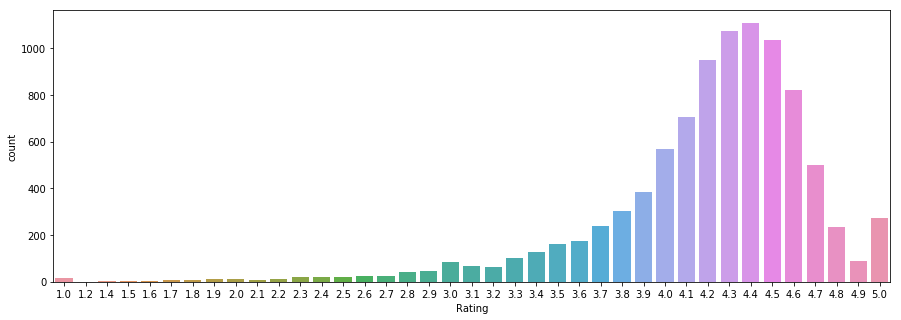

In [34]:
# Biểu đồ cho thấy số lượng Rating
plt.figure(figsize=(15,5))
sns.countplot(x='Rating',data=google_play)

In [35]:
# top 10 Category có nhiều ứng dụng nhất
g=pd.DataFrame(google_play.groupby('Category')['Category'].count())
g['Category'].nlargest(10)

Category
FAMILY           1747
GAME             1097
TOOLS             734
PRODUCTIVITY      351
MEDICAL           350
COMMUNICATION     328
FINANCE           323
SPORTS            319
PHOTOGRAPHY       317
LIFESTYLE         314
Name: Category, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

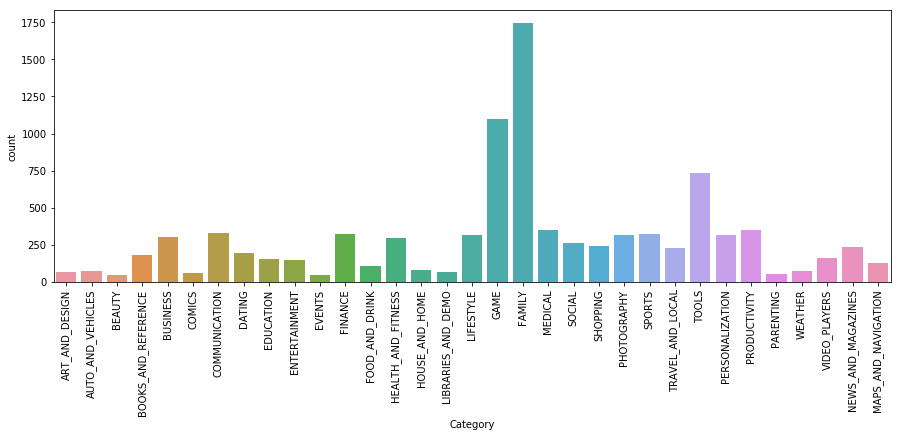

In [36]:
plt.figure(figsize=(15,5))
sns.countplot(x='Category', data=google_play)
plt.xticks(rotation=90)

([<matplotlib.patches.Wedge at 0x251af8ddeb8>,
 [Text(0.0011068219051133886, -1.0999994431568, 'Everyone'),
  Text(0.6663396117145831, 0.8752094160028551, 'Teen'),
  Text(-1.012953644073369, -0.42886468140718076, 'Everyone 10+'),
  Text(-0.8495647251180531, -0.6987415672729703, 'Mature 17+'),
  Text(-0.39189569216189185, -1.0278218554131604, 'Adults only 18+'),
  Text(-0.0003687250501648547, -1.0999999382008336, 'Unrated')],
 [Text(0.0006037210391527573, -0.5999996962673455, '0.03%'),
  Text(0.36345797002613617, 0.47738695418337546, '79.22%'),
  Text(-0.5525201694945648, -0.2339261898584622, '4.24%'),
  Text(-0.4633989409734835, -0.38113176396707465, '4.92%'),
  Text(-0.21376128663375918, -0.5606301029526329, '11.57%'),
  Text(-0.00020112275463537527, -0.5999999662913637, '0.01%')])

<Figure size 432x288 with 0 Axes>

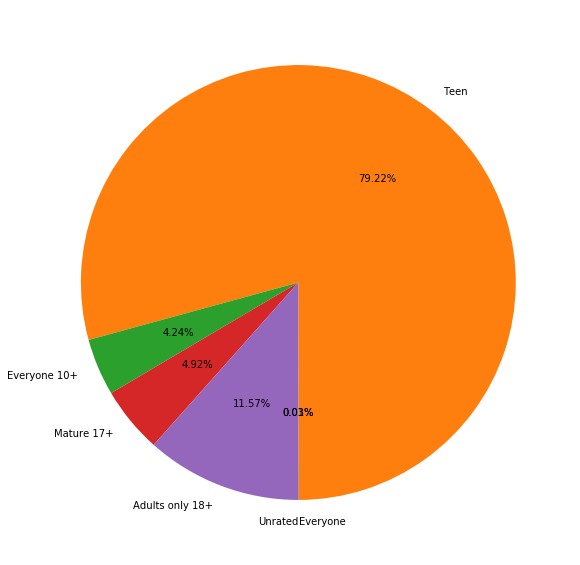

In [37]:
# biểu đồ thể hiện tỷ lệ các thành phần trong Content Rating
g=pd.DataFrame(google_play.groupby('Content Rating')['Content Rating'].count())
cont = list(google_play['Content Rating'].unique())
plt.tight_layout()
plt.figure(figsize=(20,10))
plt.pie(g, labels=cont, startangle = -90, autopct = '%.2f%%')

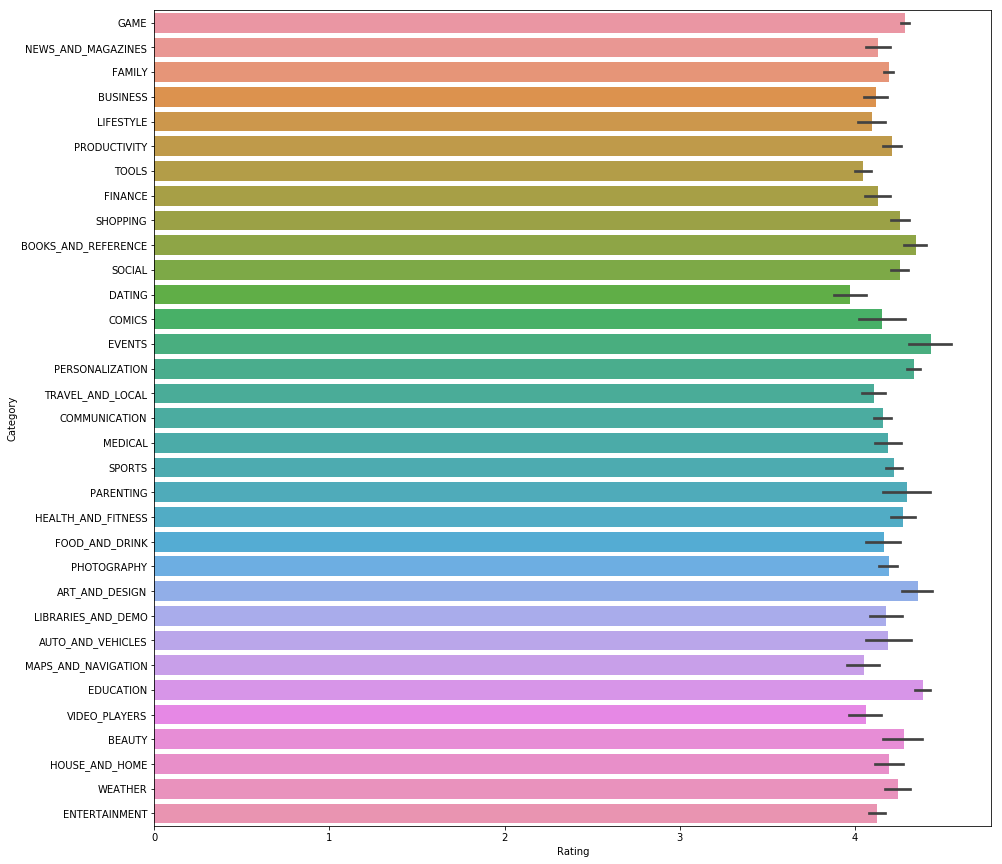

In [38]:
# biểu đồ thể hiện các Rating theo từng Category
plt.figure(figsize=(15,15))
google_play_copy=google_play.sort_values(by='Rating',ascending=False)
sns.barplot(x='Rating', y='Category', data=google_play_copy)

In [39]:
# top  category có rating là 5
rating=google_play[google_play.Rating==5.0].reset_index()
rating.head(10)

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15000000.0,37000000.0,1000,Free,0.0,Everyone,Comics,2018-06-26,2.0,4.0.3
1,612,American Girls Mobile Numbers,DATING,5.0,5000000.0,4400000.0,1000,Free,0.0,Mature 17+,Dating,2018-07-17,3.0,4.0.3
2,615,Awake Dating,DATING,5.0,2000000.0,70000000.0,100,Free,0.0,Mature 17+,Dating,2018-07-24,2.2.9,4.4
3,633,Spine- The dating app,DATING,5.0,5000000.0,9300000.0,500,Free,0.0,Teen,Dating,2018-07-14,4.0,4.0.3
4,636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6000000.0,5000000.0,100,Free,0.0,Mature 17+,Dating,2018-08-01,8.2,4.0.3
5,640,Online Girls Chat Group,DATING,5.0,5000000.0,5000000.0,100,Free,0.0,Mature 17+,Dating,2018-08-02,8.2,4.0.3
6,654,Speeding Joyride & Car Meet App,DATING,5.0,3000000.0,25000000.0,100,Free,0.0,Mature 17+,Dating,2018-07-20,1.2.9,4.1
7,1028,SUMMER SONIC app,EVENTS,5.0,4000000.0,61000000.0,500,Free,0.0,Everyone,Events,2018-07-24,1.0,4.4
8,1030,Prosperity,EVENTS,5.0,16000000.0,2300000.0,100,Free,0.0,Everyone,Events,2018-07-09,1.14,2.0
9,1038,Mindvalley U Tallinn 2018,EVENTS,5.0,1000000.0,21000000.0,100,Free,0.0,Everyone,Events,2018-07-03,1.0.5,4.4


Ta thấy Rating là 5 nhưng mà lượt Installs về lại không cao hơn các ứng dụng khác

In [40]:
# các ứng dụng có rating 5 và có số lượng Reviews nhiều nhất
rating.nlargest(5,'Reviews')

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
255,10357,Ríos de Fe,LIFESTYLE,5.0,141000000.0,15000000.0,1000,Free,0.0,Everyone,Lifestyle,2018-03-24,1.8,4.1
251,10301,"FD Calculator (EMI, SIP, RD & Loan Eligilibility)",FINANCE,5.0,104000000.0,2300000.0,1000,Free,0.0,Everyone,Finance,2018-08-07,2.1.0,4.1
168,8058,Oración CX,LIFESTYLE,5.0,103000000.0,3800000.0,5000,Free,0.0,Everyone,Lifestyle,2017-09-12,5.1.10,4.1
102,6823,Barisal University App-BU Face,FAMILY,5.0,100000000.0,10000000.0,1000,Free,0.0,Everyone,Education,2018-05-06,3.1.1,4.0.3
229,9496,Master E.K,FAMILY,5.0,90000000.0,999000000.0,1000,Free,0.0,Everyone,Education,2017-08-11,1.5.0,4.4


In [41]:
# top category theo Reviews
category_reviews=pd.DataFrame(google_play.groupby('Category')['Content Rating'].count())


In [42]:
rating.nlargest(5,'Installs')

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
232,9511,Ek Bander Ne Kholi Dukan,FAMILY,5.0,10000000.0,3000000.0,10000,Free,0.0,Everyone,Entertainment,2017-06-26,1.0.9,4.0
147,7514,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5.0,24000000.0,3200000.0,5000,Free,0.0,Everyone,Tools,2018-06-13,1.1.3,4.3
168,8058,Oración CX,LIFESTYLE,5.0,103000000.0,3800000.0,5000,Free,0.0,Everyone,Lifestyle,2017-09-12,5.1.10,4.1
177,8260,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5.0,34000000.0,12000000.0,5000,Free,0.0,Everyone,Comics,2018-07-31,1.0.5,5.0
0,329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15000000.0,37000000.0,1000,Free,0.0,Everyone,Comics,2018-06-26,2.0,4.0.3


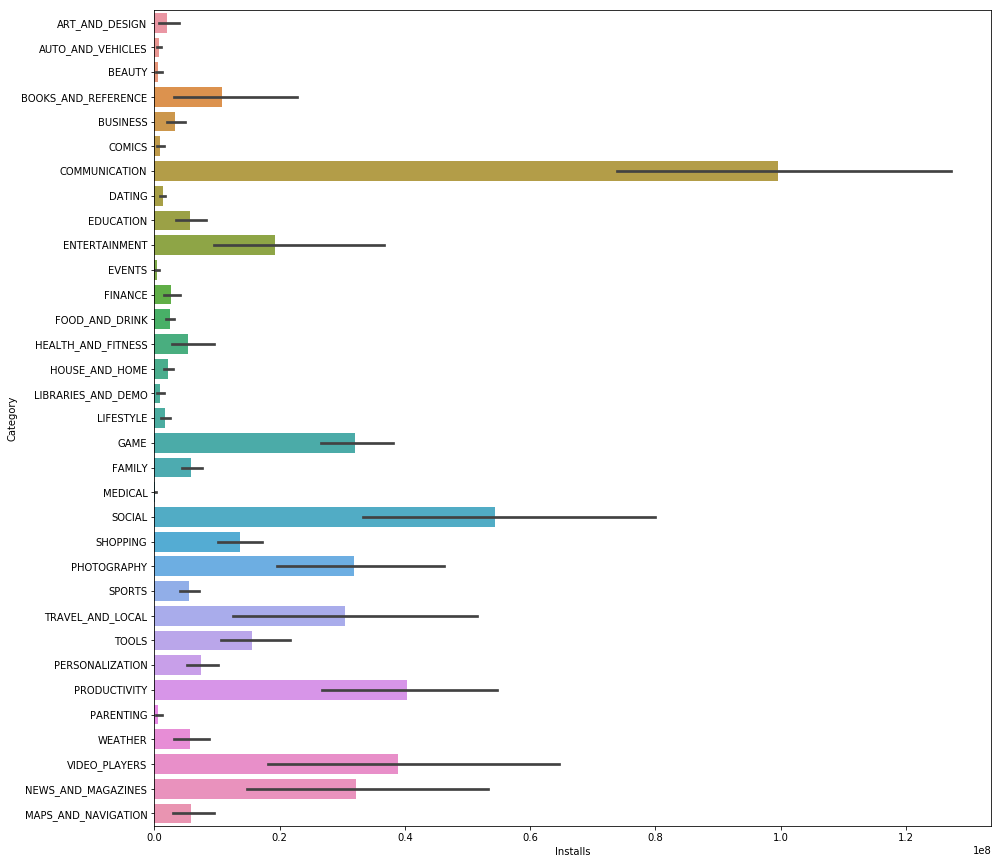

In [43]:
# category co luot Install
plt.figure(figsize=(15,15))
sns.barplot(x='Installs', y='Category', data=google_play)

In [44]:
# top category theo Installs
category=pd.DataFrame(google_play.groupby('Category')['Category'].count())

In [45]:
export_csv = google_play.to_csv (r'../google-play-store-1.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path
